In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from typing import List
np.set_printoptions(threshold=np.inf)  

from fragment import *
from side import *
from sides_comparison import *
from utils import *
from puzzle import *
import global_values
from displaying import *
from groups import *
from merge_groups_best_candidate import *


In [2]:
image_path = "disney_puzzle/aladin.jpg" 
# image_path = "angry.jpg"
output_folder = "fragments"
global_values.COL_NR = 8
global_values.ROW_NR = 8
fragments, tile_h, tile_w = divide_image(image_path, output_folder, global_values.COL_NR, global_values.ROW_NR)
global_values.TILE_H = global_values.TILE_W = max(tile_h, tile_w)
sides_comparisons = create_sides_comparisons(fragments)



sorted_sides_comparisons = sort_sides_comparisons(sides_comparisons)

n = len(fragments)
s = 4  
global_values.SYMMETRIC_COMPARISONS = [[[[None for _ in range(s)] for _ in range(s)] for _ in range(n)] for _ in range(n)]

for c in sides_comparisons:
    global_values.SYMMETRIC_COMPARISONS[c.side1.fragment_idx][c.side2.fragment_idx][c.side1.side_idx][c.side2.side_idx] = c
    symmetric_comp = SidesComparison(fragments, c.side2, c.side1)
    global_values.SYMMETRIC_COMPARISONS[c.side2.fragment_idx][c.side1.fragment_idx][c.side2.side_idx][c.side1.side_idx] = symmetric_comp



Rotations by fragment: 0)3.0, 1)2.0, 2)2.0, 3)2.0, 4)1.0, 5)2.0, 6)0.0, 7)0.0, 8)1.0, 9)3.0, 10)3.0, 11)2.0, 12)2.0, 13)3.0, 14)1.0, 15)0.0, 16)1.0, 17)1.0, 18)1.0, 19)1.0, 20)2.0, 21)0.0, 22)0.0, 23)2.0, 24)3.0, 25)0.0, 26)3.0, 27)1.0, 28)3.0, 29)2.0, 30)0.0, 31)3.0, 32)2.0, 33)0.0, 34)2.0, 35)0.0, 36)3.0, 37)2.0, 38)0.0, 39)3.0, 40)1.0, 41)0.0, 42)1.0, 43)1.0, 44)2.0, 45)0.0, 46)2.0, 47)0.0, 48)2.0, 49)1.0, 50)1.0, 51)2.0, 52)2.0, 53)2.0, 54)2.0, 55)1.0, 56)2.0, 57)0.0, 58)2.0, 59)2.0, 60)0.0, 61)0.0, 62)2.0, 63)0.0


100%|██████████| 63/63 [00:02<00:00, 28.36it/s]


In [3]:
groups = []
fragment_idx_to_group_idx = [None for _ in fragments]

for fr_idx in range(len(fragments)):
    new_group = Group(fr_idx)
    groups.append(new_group)
    fragment_idx_to_group_idx[fr_idx] = fr_idx
# show_all_groups(groups, fragments)
print(fragment_idx_to_group_idx)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


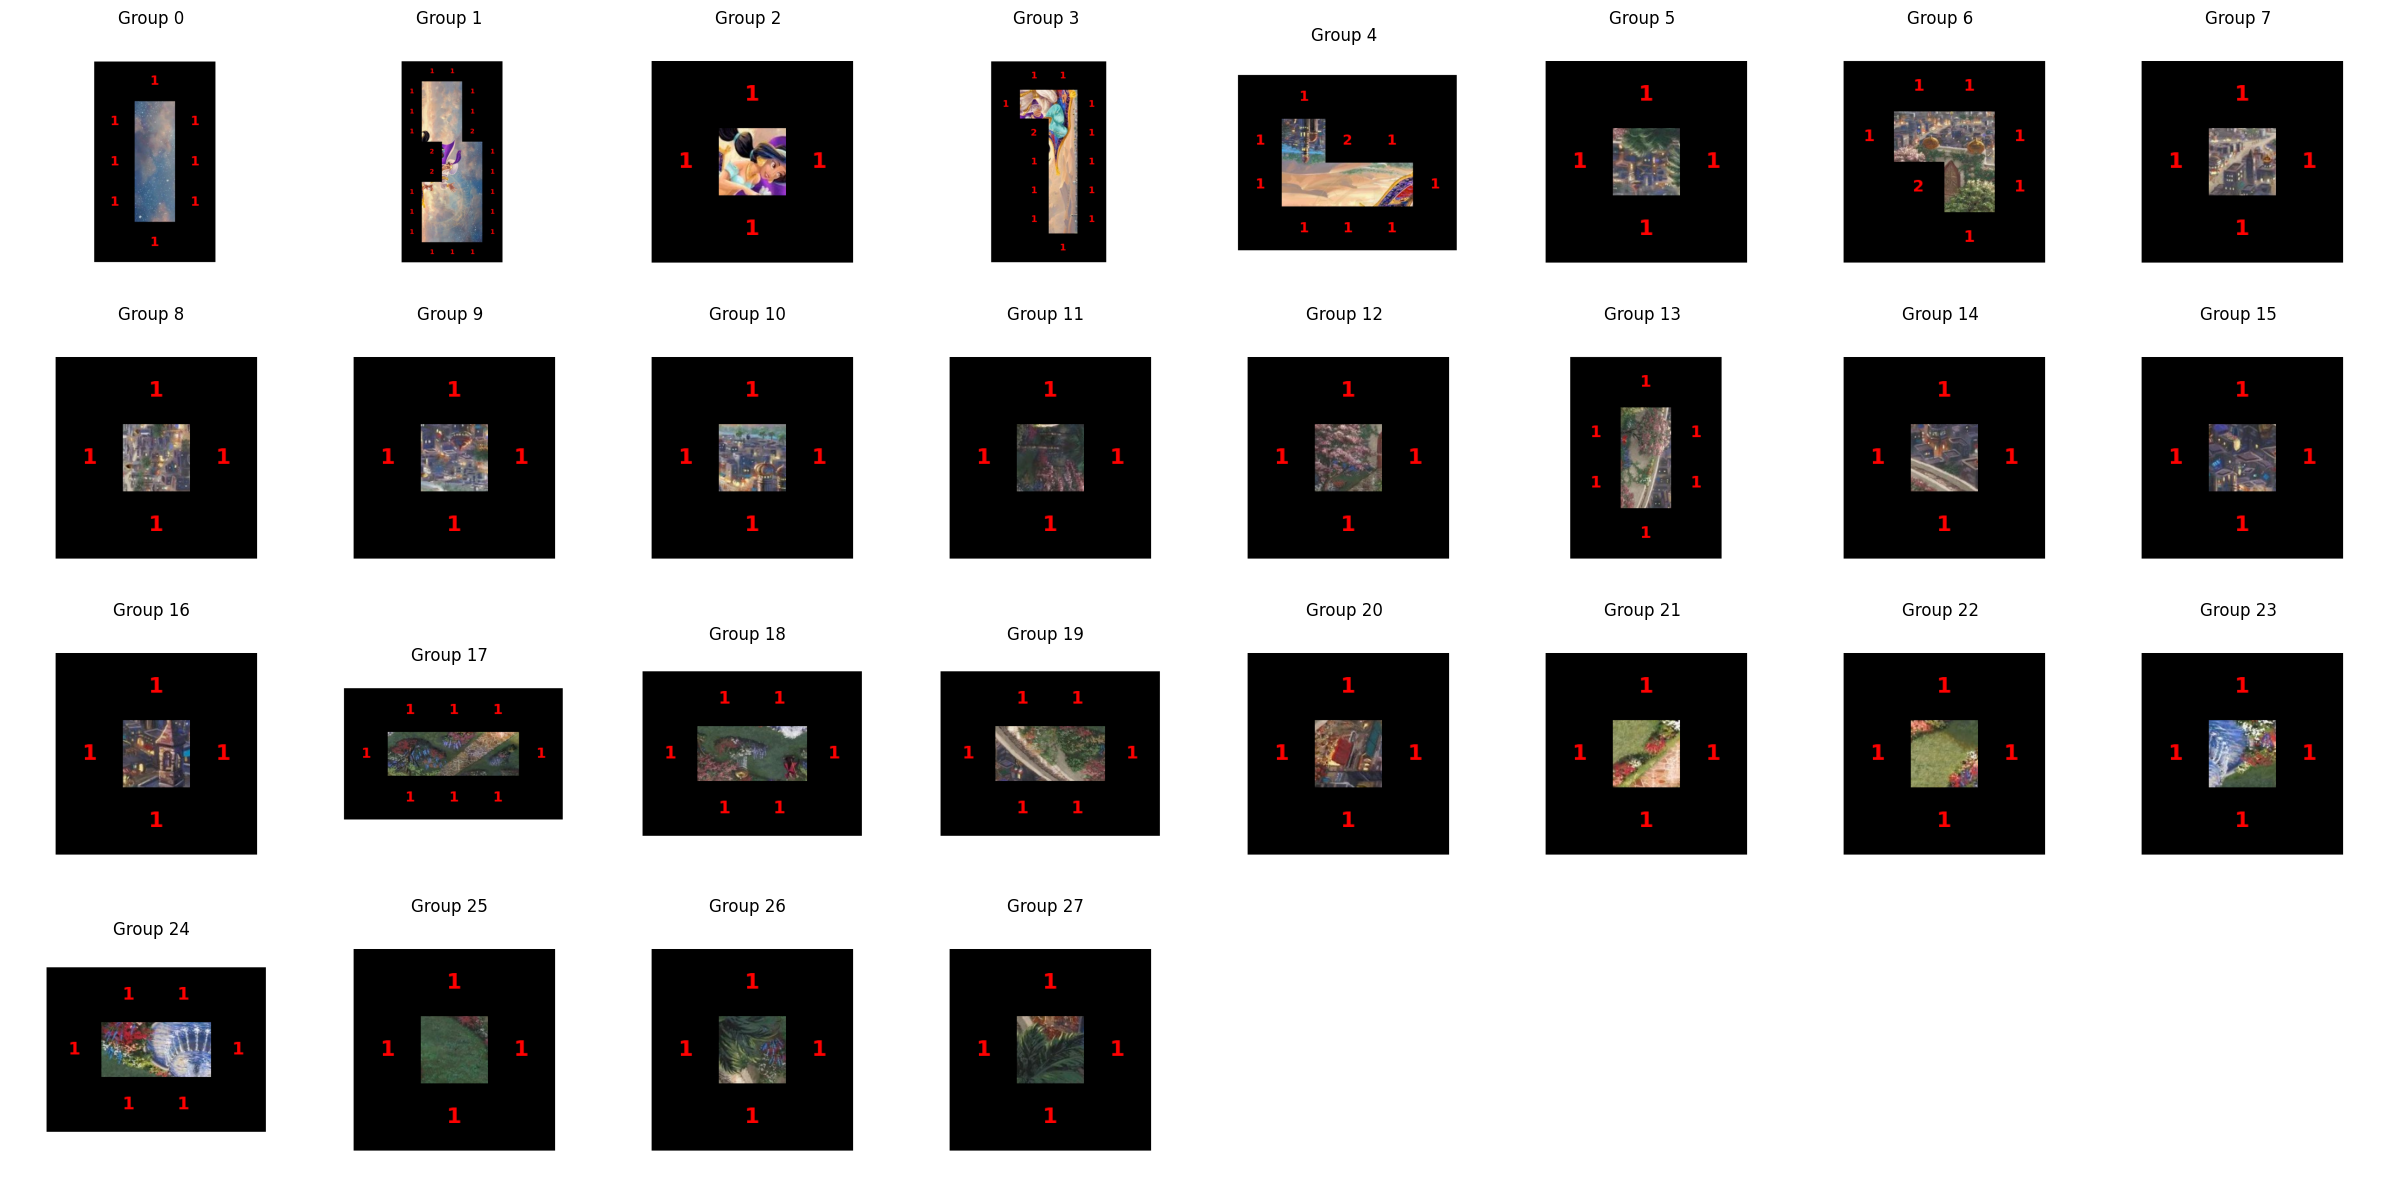

In [4]:
for comp in sorted_sides_comparisons:
    if comp.score <= global_values.IMAGE_TH:

        anchor_fragment_idx = comp.side1.fragment_idx
        pasted_fragment_idx = comp.side2.fragment_idx
        anchor_group_idx = fragment_idx_to_group_idx[anchor_fragment_idx]
        pasted_group_idx = fragment_idx_to_group_idx[pasted_fragment_idx]

        if anchor_group_idx != pasted_group_idx:

            shifted_anchor_group, shifted_pasted_group, pasted_group_additional_rotation = simulate_merge_positions(fragments, comp, groups[anchor_group_idx], groups[pasted_group_idx])

            if does_merge_fit_within_bounds(shifted_anchor_group):
                if check_groups_shapes_for_merging(shifted_anchor_group, shifted_pasted_group):
                    # print(f"{comp}")

                    if check_all_group_matchings_scores(fragments, pasted_group_additional_rotation, shifted_anchor_group, shifted_pasted_group):    
                    # score = calculate_all_group_matchings_scores(shifted_anchor_group, shifted_pasted_group)
                        # anchor_img = shifted_anchor_group.show_group(fragments,0)
                        # pasted_img = shifted_pasted_group.show_group(fragments,pasted_group_additional_rotation)
                        # plt.imshow(anchor_img)
                        # plt.show()
                        # plt.imshow(pasted_img)
                        # plt.show()
                        # print("-------------------------------------------")
                        groups[anchor_group_idx] = merge_groups(fragments, pasted_group_additional_rotation, shifted_anchor_group, shifted_pasted_group, fragment_idx_to_group_idx)
                        update_after_merge(groups, fragments, fragment_idx_to_group_idx, pasted_group_idx)
show_all_groups(groups, fragments, fragment_idx_to_group_idx, 0)

# for g in groups:
#     print(g.fragment_positions)


Merged group 1 and 0 with total score: 0.5659473606663652 using: Sides Comp: Score=1.734576481809629 Fragment_idx1=3, Side_idx1=1; fragment_idx2=2, side_idx2=3


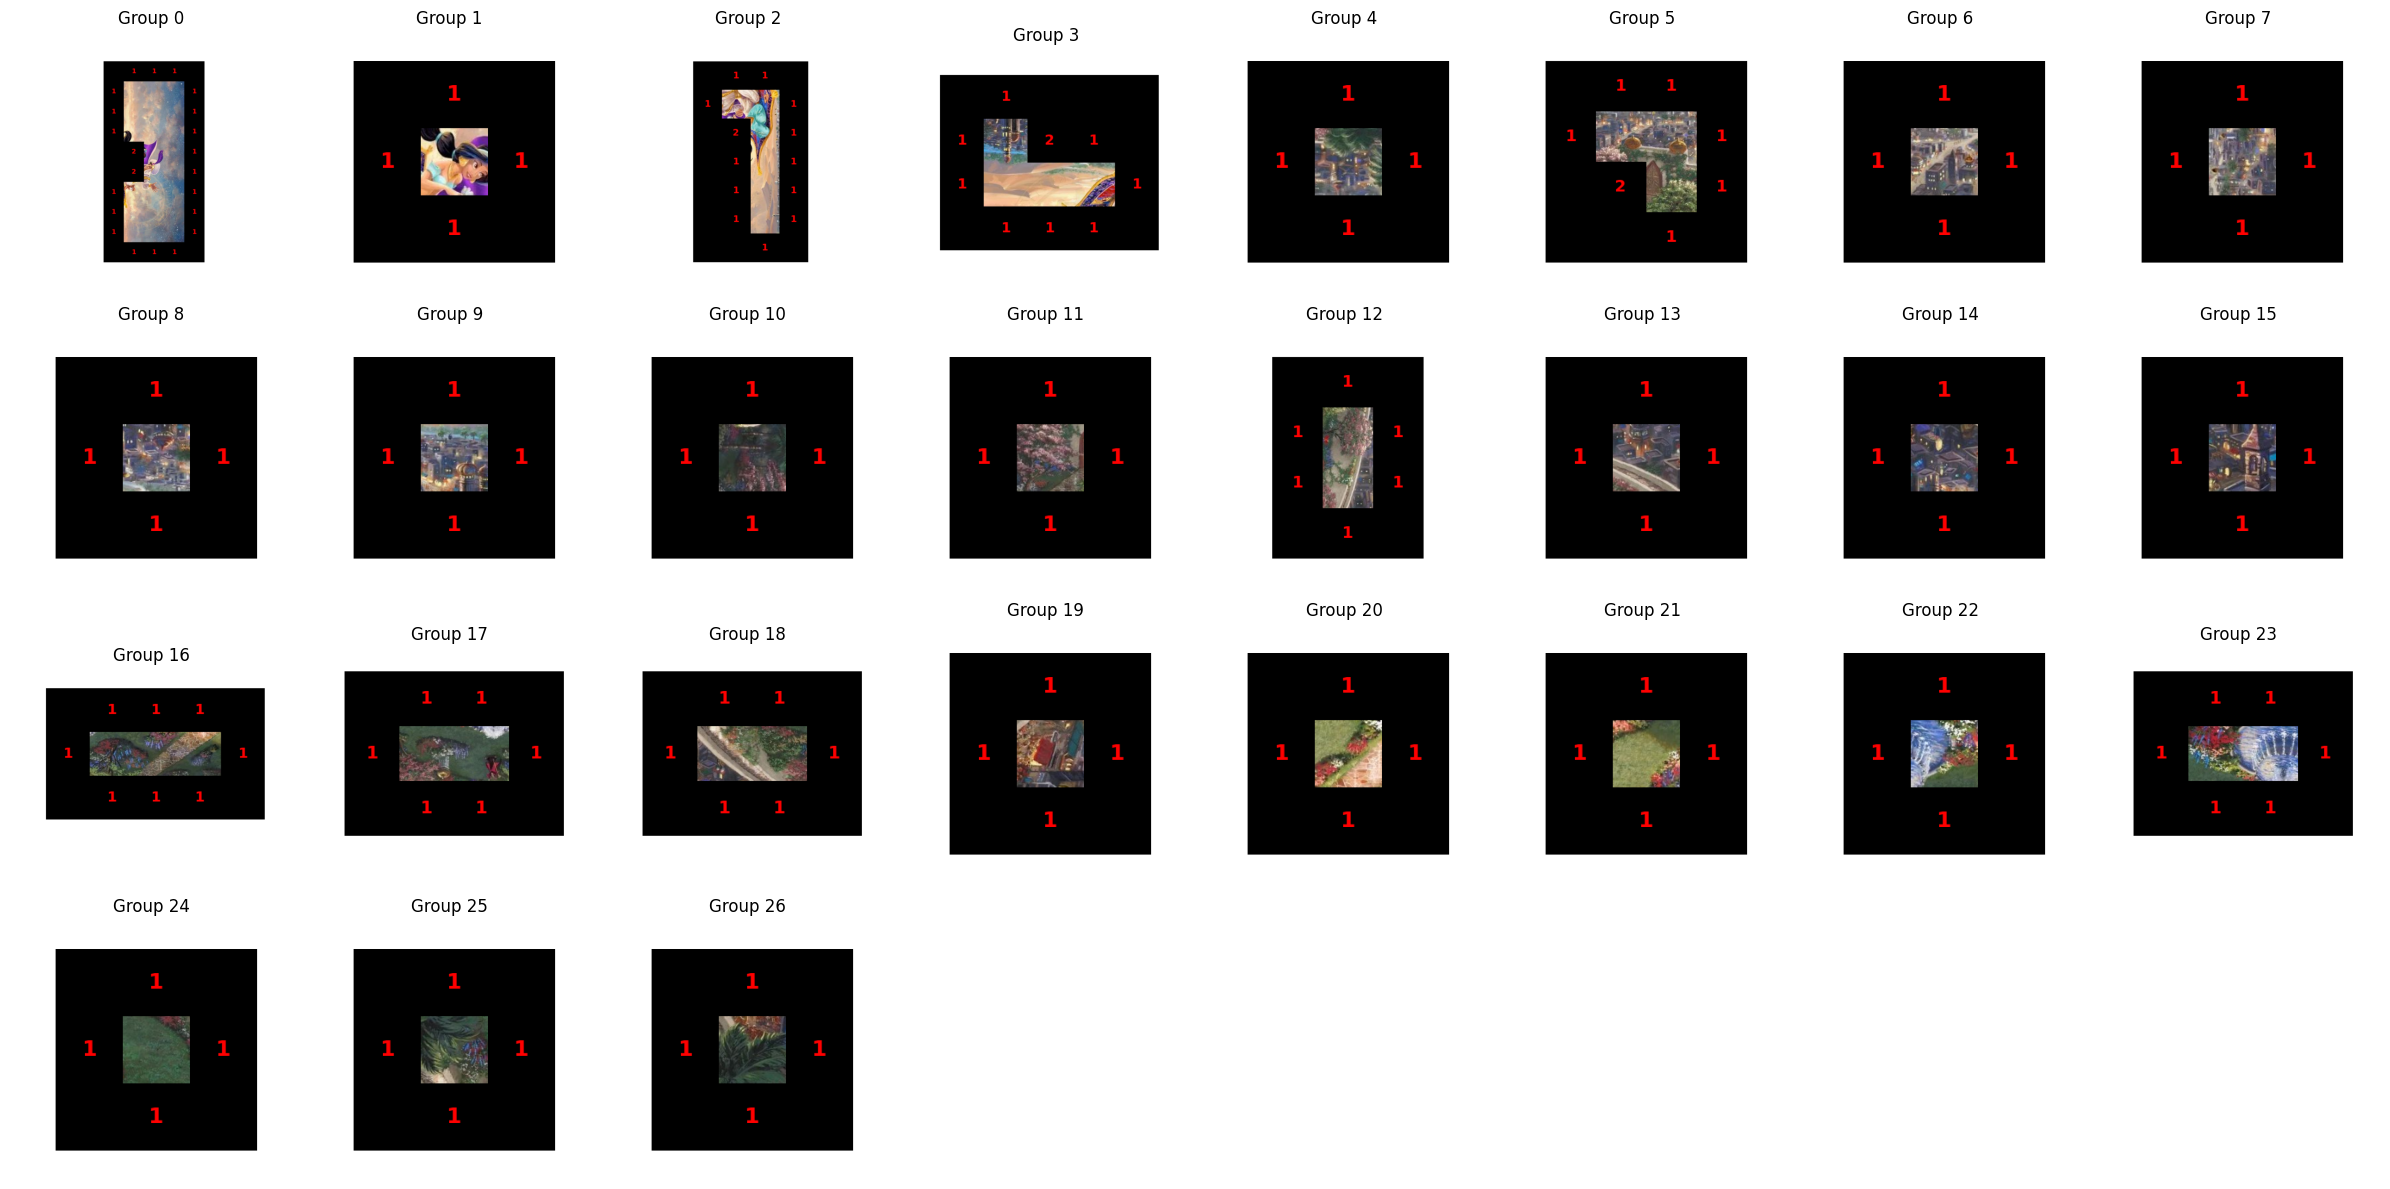

Merged group 3 and 9 with total score: 0.6922784298415148 using: Sides Comp: Score=0.04896098173664514 Fragment_idx1=30, Side_idx1=2; fragment_idx2=38, side_idx2=0


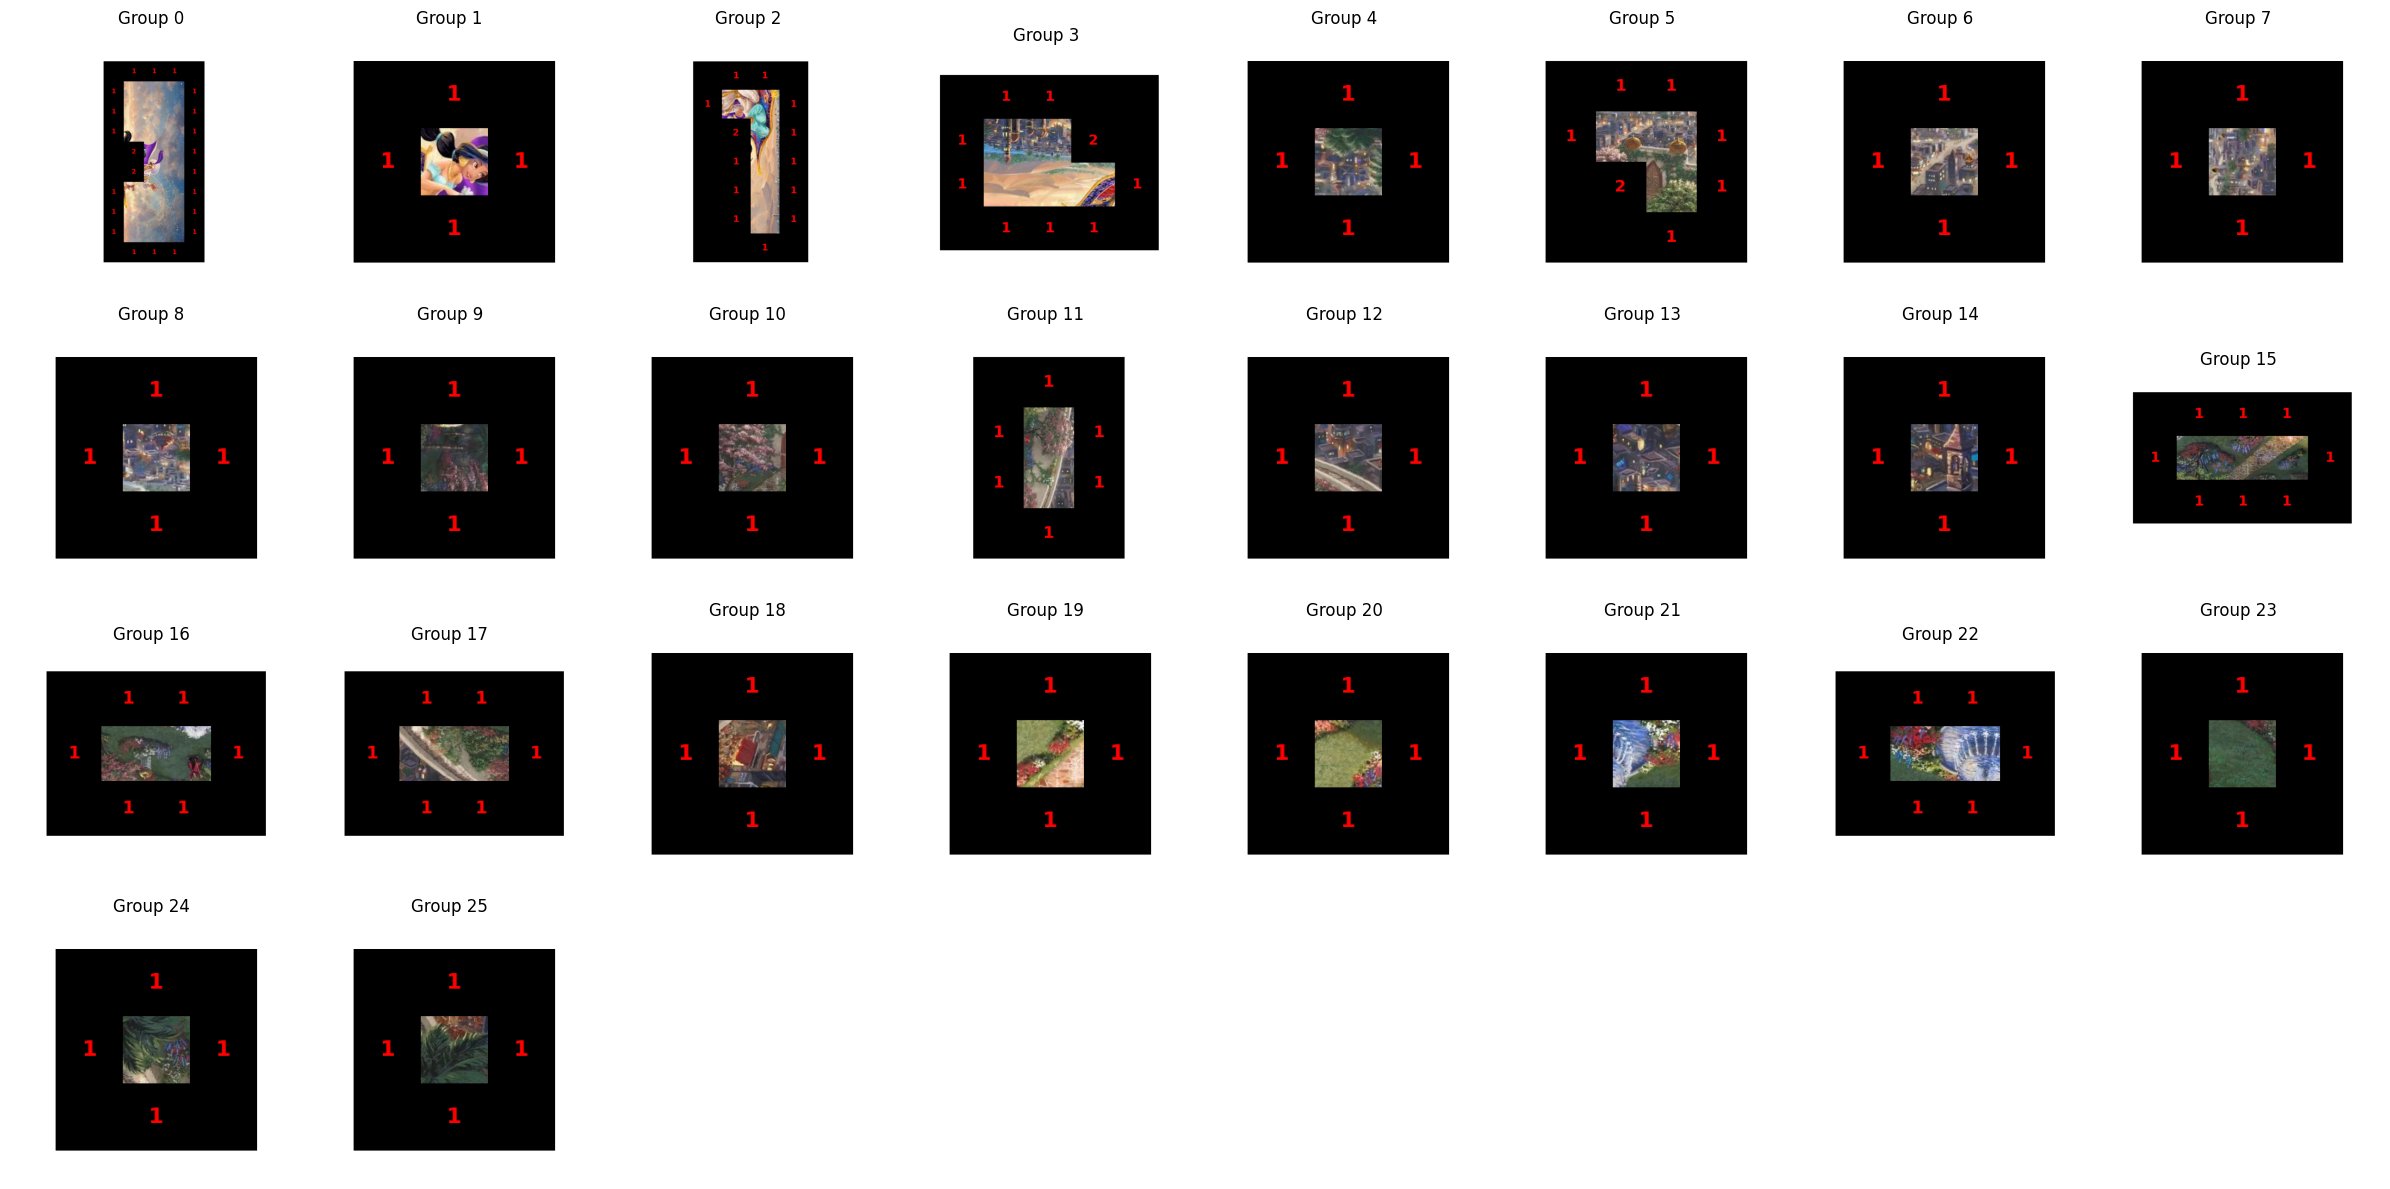

Merged group 3 and 8 with total score: 0.8013490589116746 using: Sides Comp: Score=0.5101277857259932 Fragment_idx1=29, Side_idx1=0; fragment_idx2=37, side_idx2=2


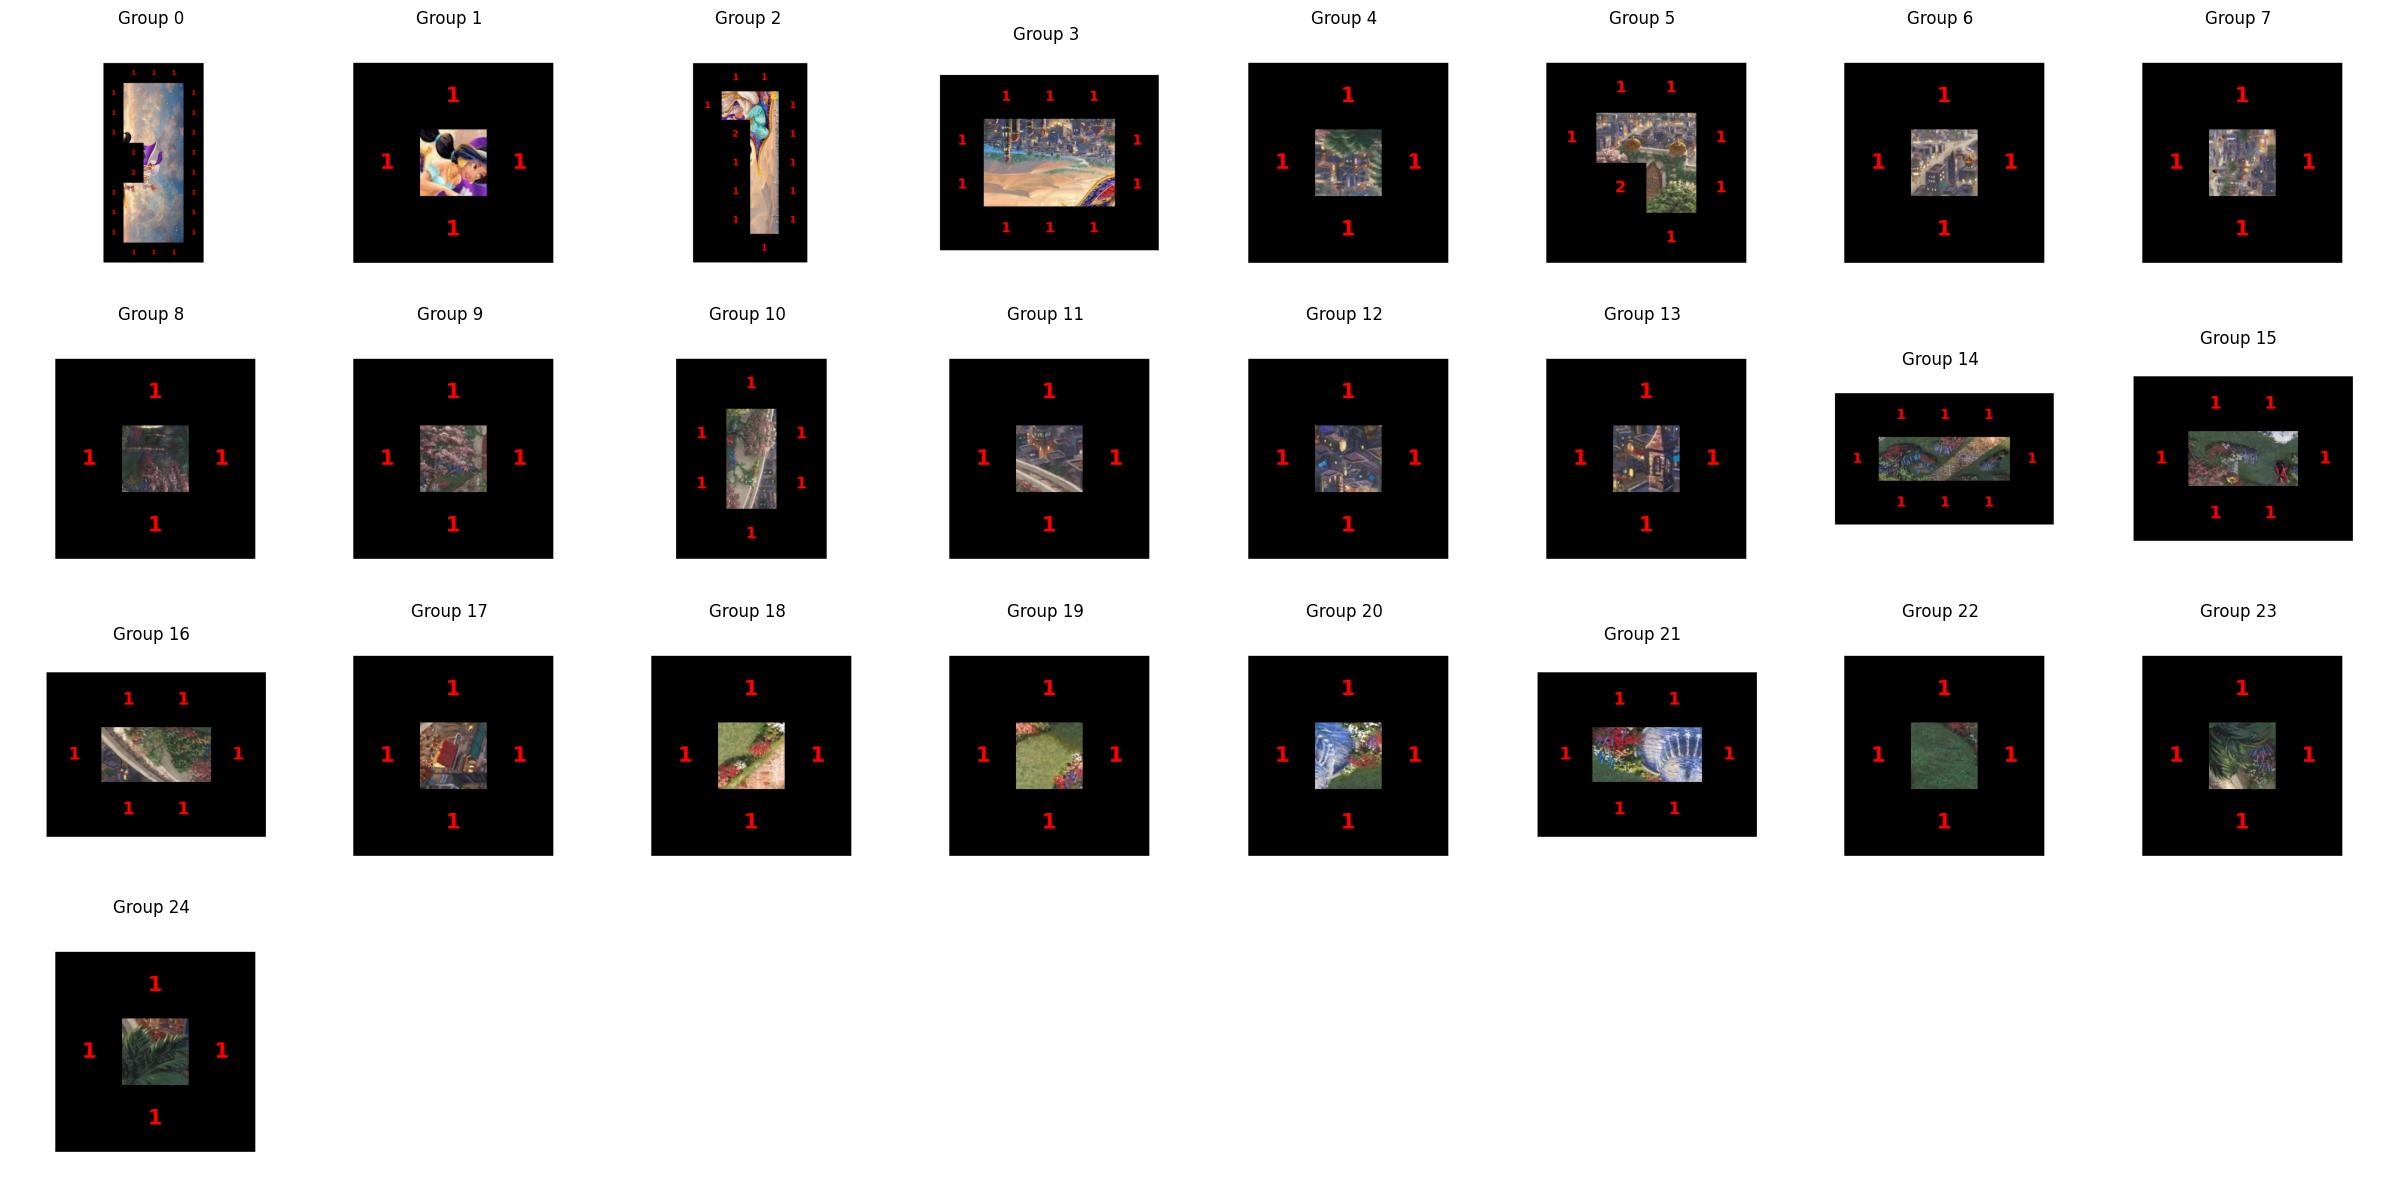

Merged group 0 and 1 with total score: 11.52863214527506 using: Sides Comp: Score=0.034087825798111634 Fragment_idx1=18, Side_idx1=2; fragment_idx2=19, side_idx2=0


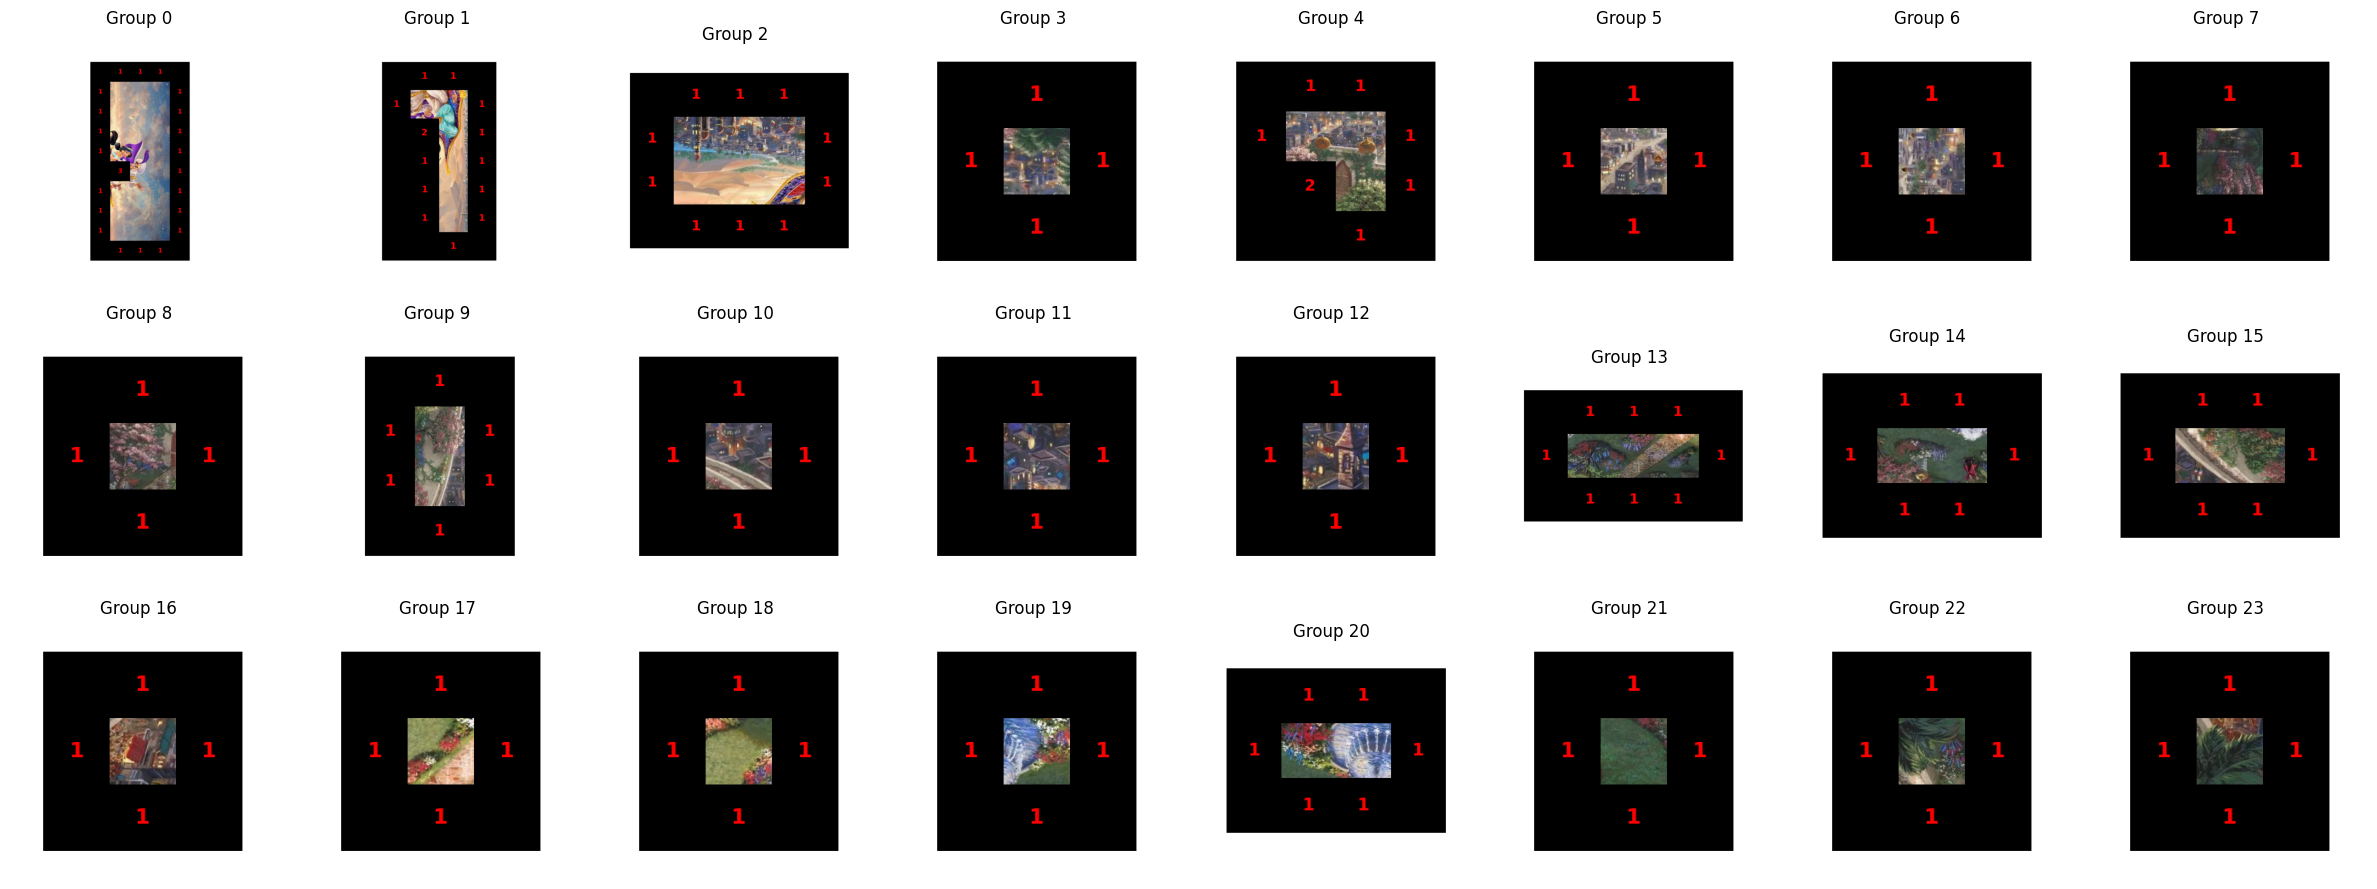

Merged group 0 and 1 with total score: 27950499972.11716 using: Sides Comp: Score=100872541.79938258 Fragment_idx1=19, Side_idx1=2; fragment_idx2=20, side_idx2=1


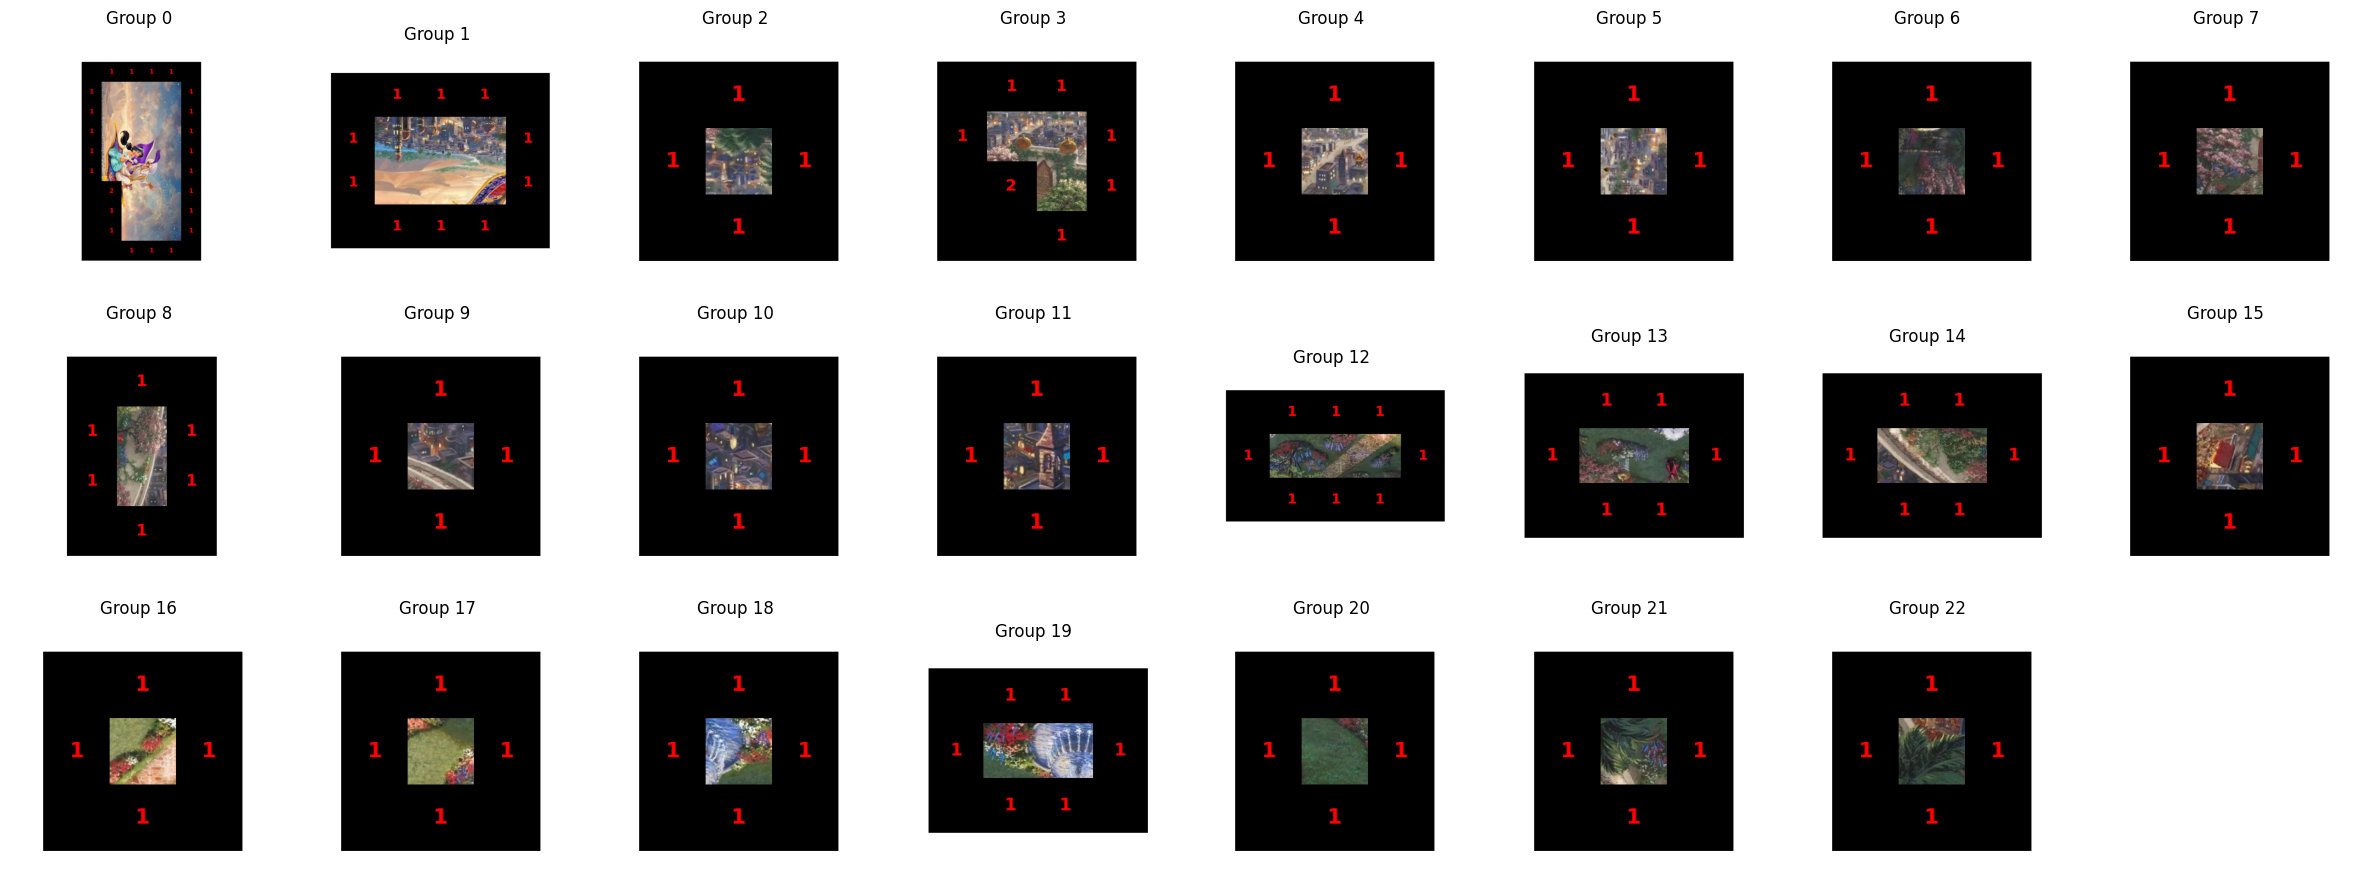

Merged group 3 and 7 with total score: 3755.746895953813 using: Sides Comp: Score=2498.806215196757 Fragment_idx1=33, Side_idx1=2; fragment_idx2=41, side_idx2=0


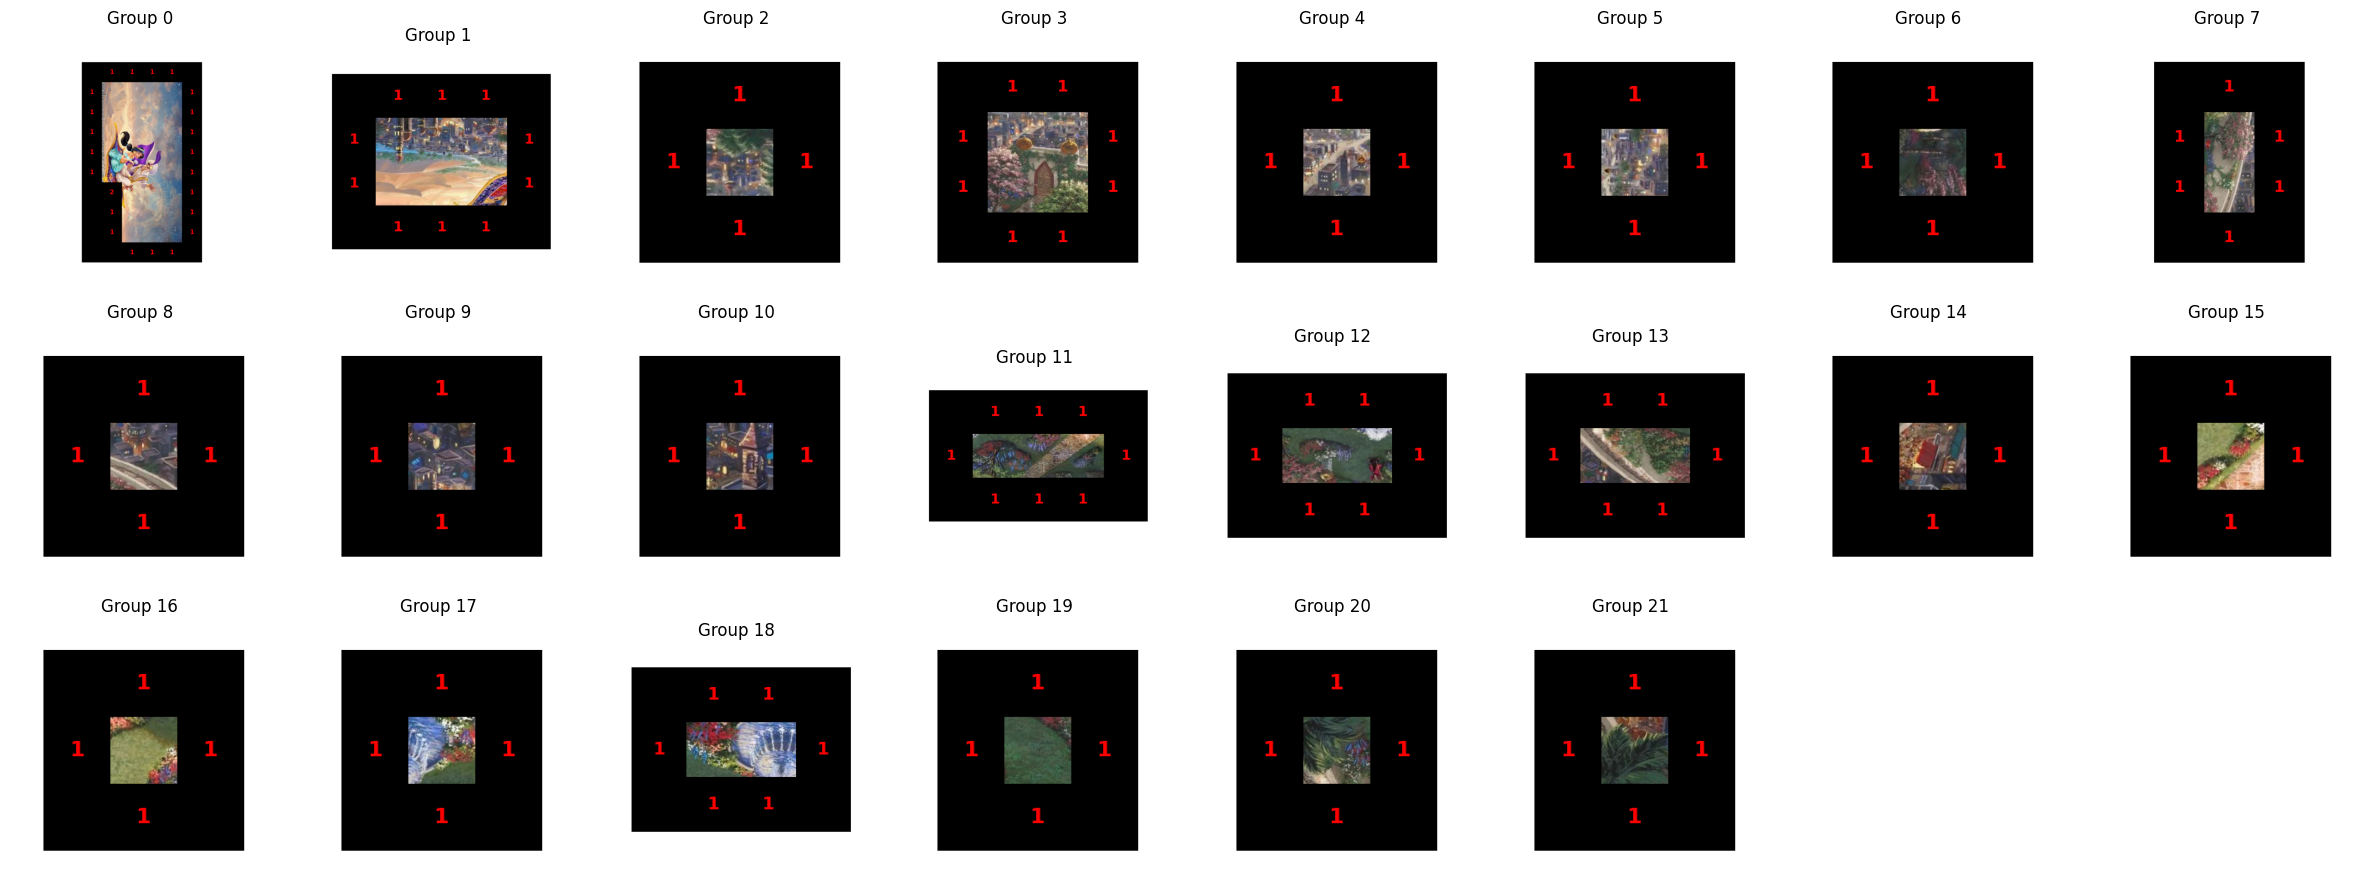

Merged group 0 and 1 with total score: 405594527988.042 using: Sides Comp: Score=41369.0584834177 Fragment_idx1=28, Side_idx1=0; fragment_idx2=29, side_idx2=1


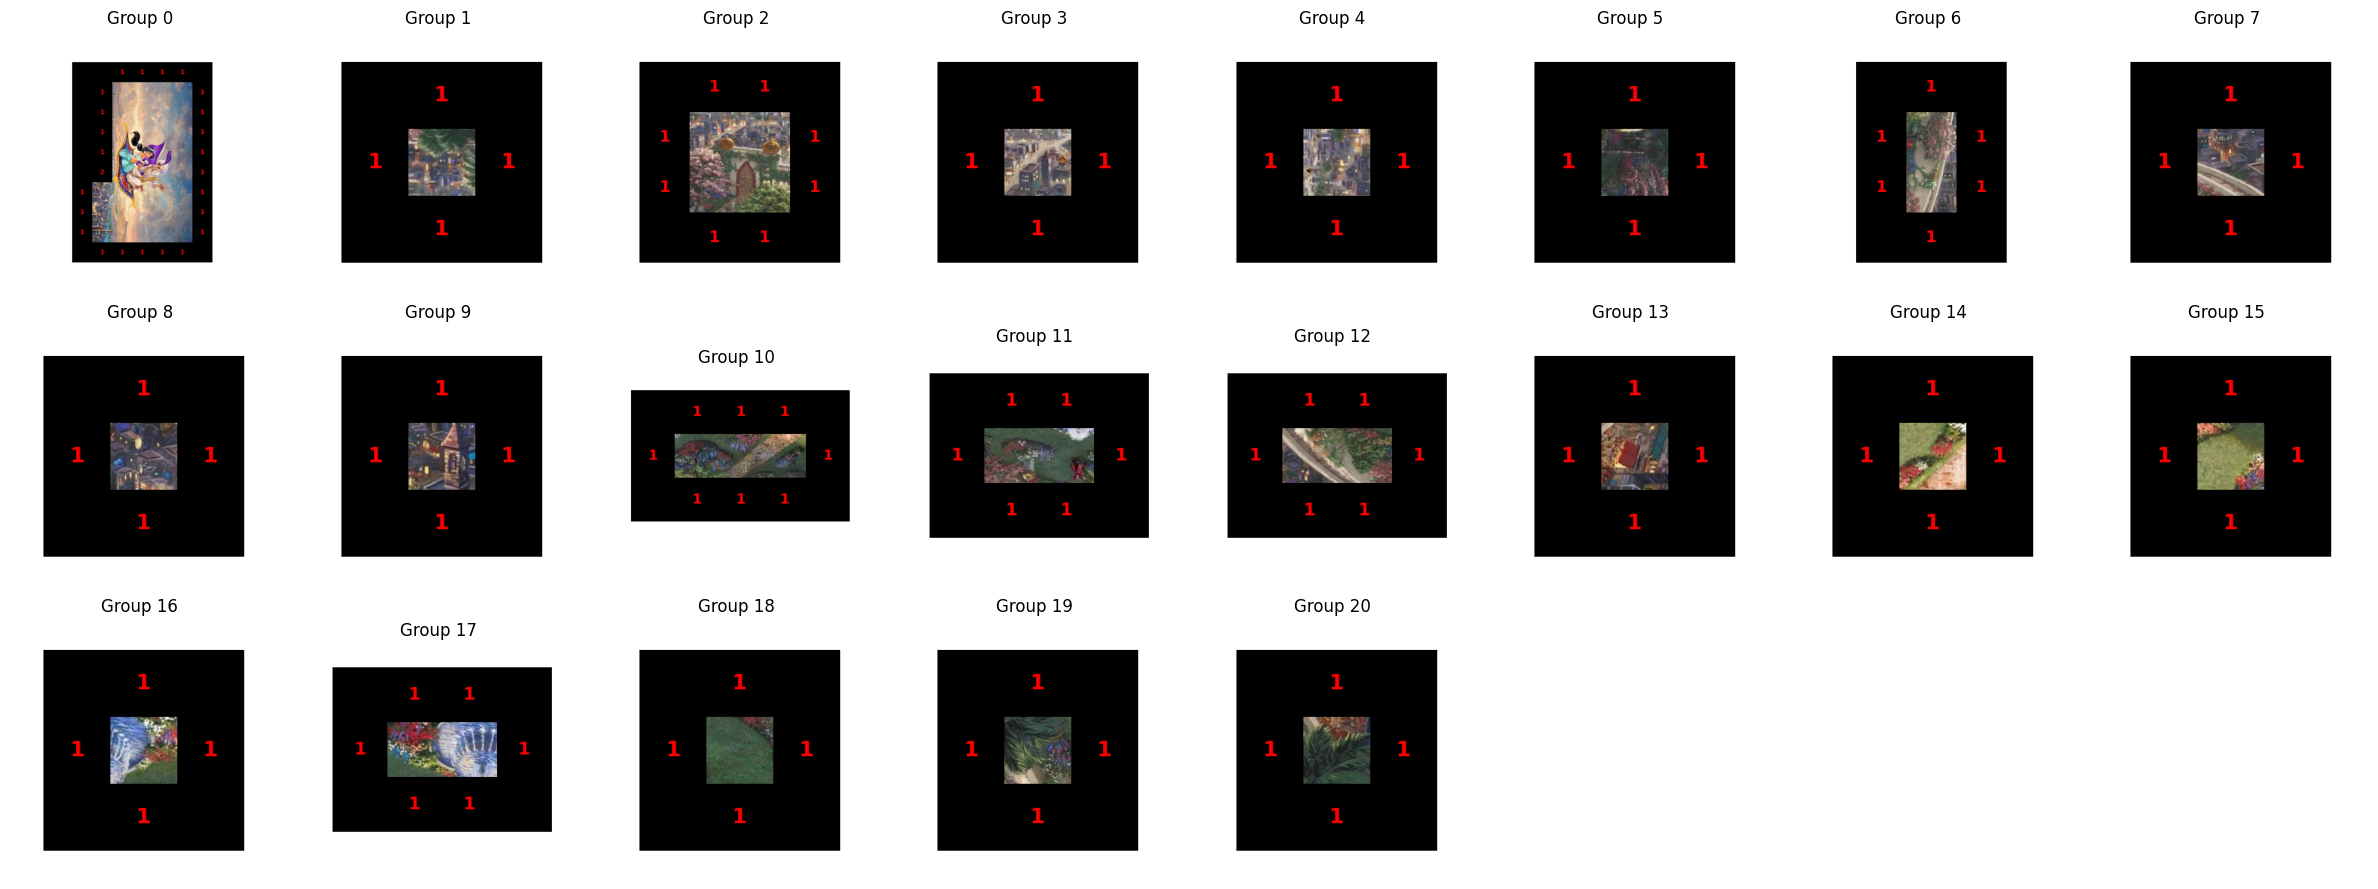

Merged group 0 and 4 with total score: 408472.18159085745 using: Sides Comp: Score=90411.09922132018 Fragment_idx1=28, Side_idx1=1; fragment_idx2=36, side_idx2=3


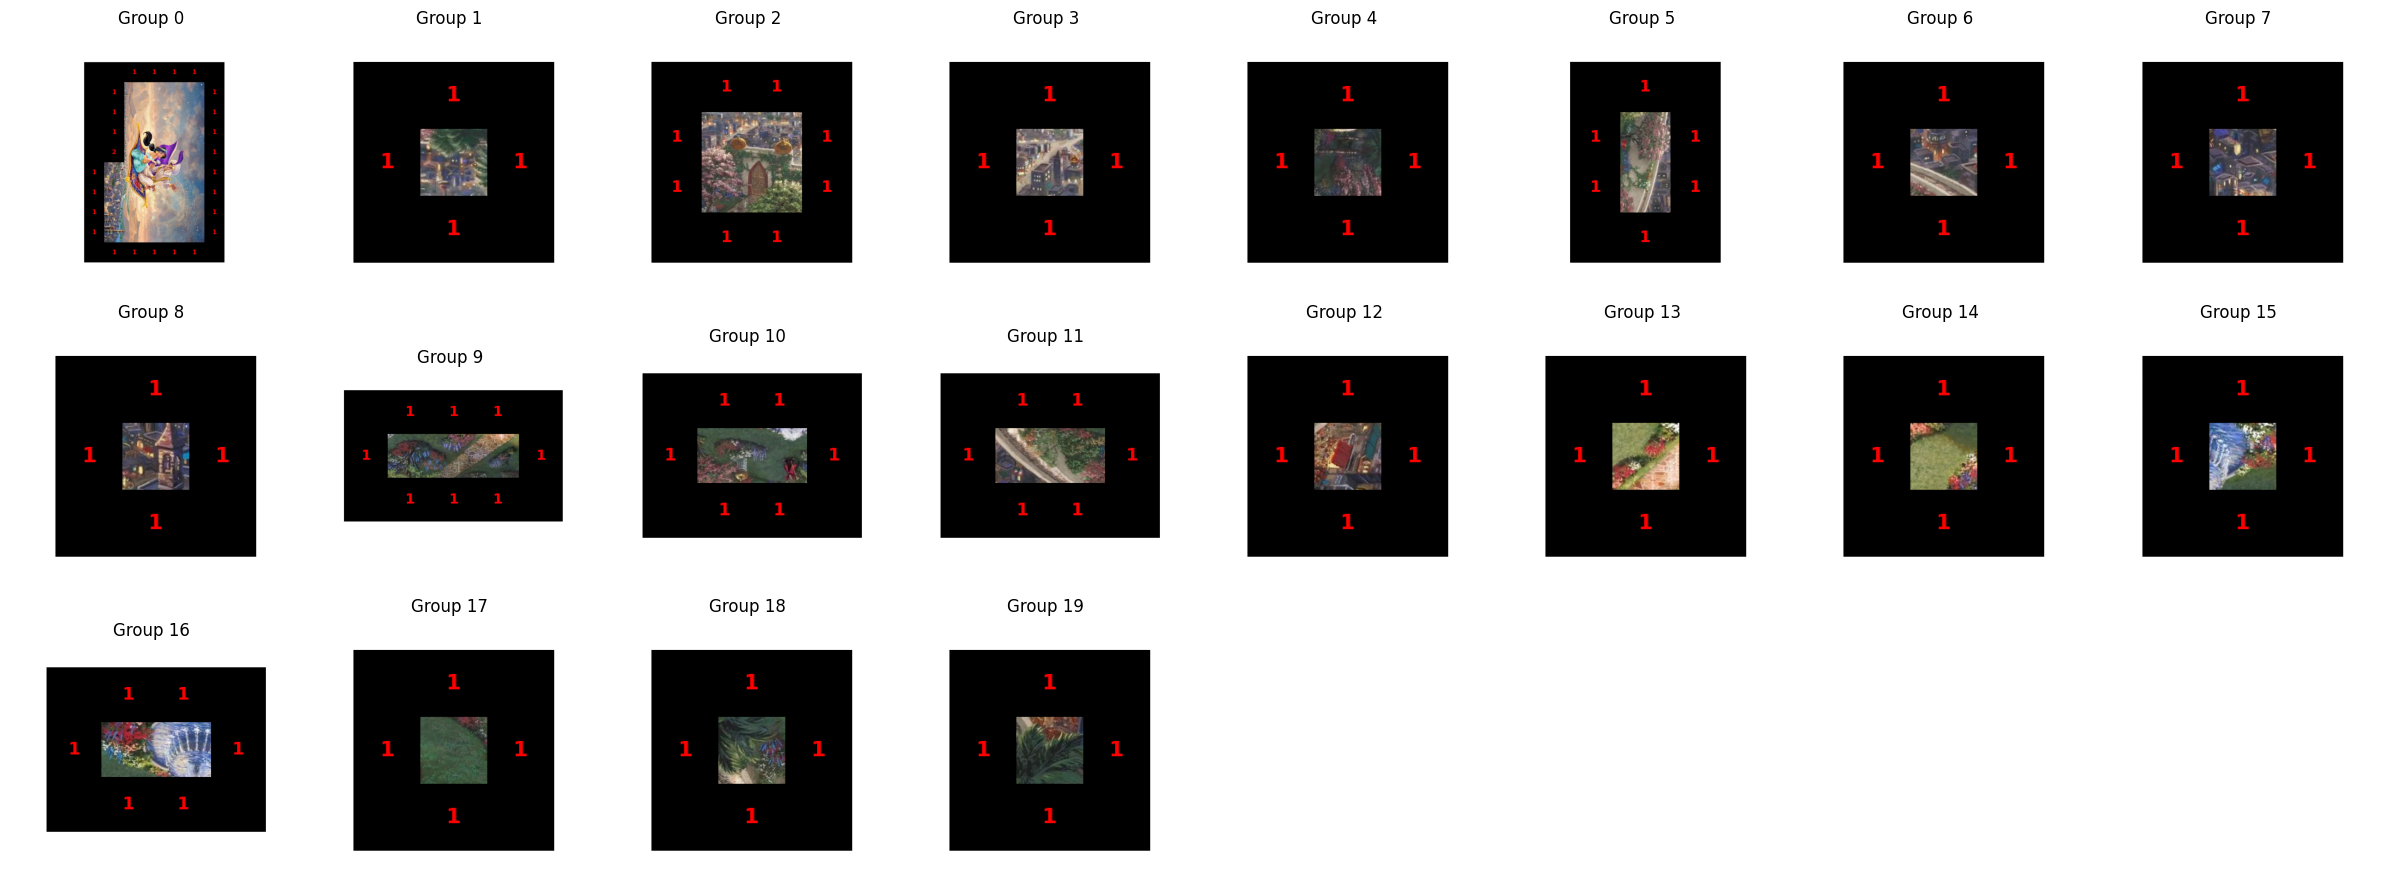

Merged group 0 and 3 with total score: 1452.4432884887012 using: Sides Comp: Score=32.05749871995095 Fragment_idx1=27, Side_idx1=3; fragment_idx2=35, side_idx2=0


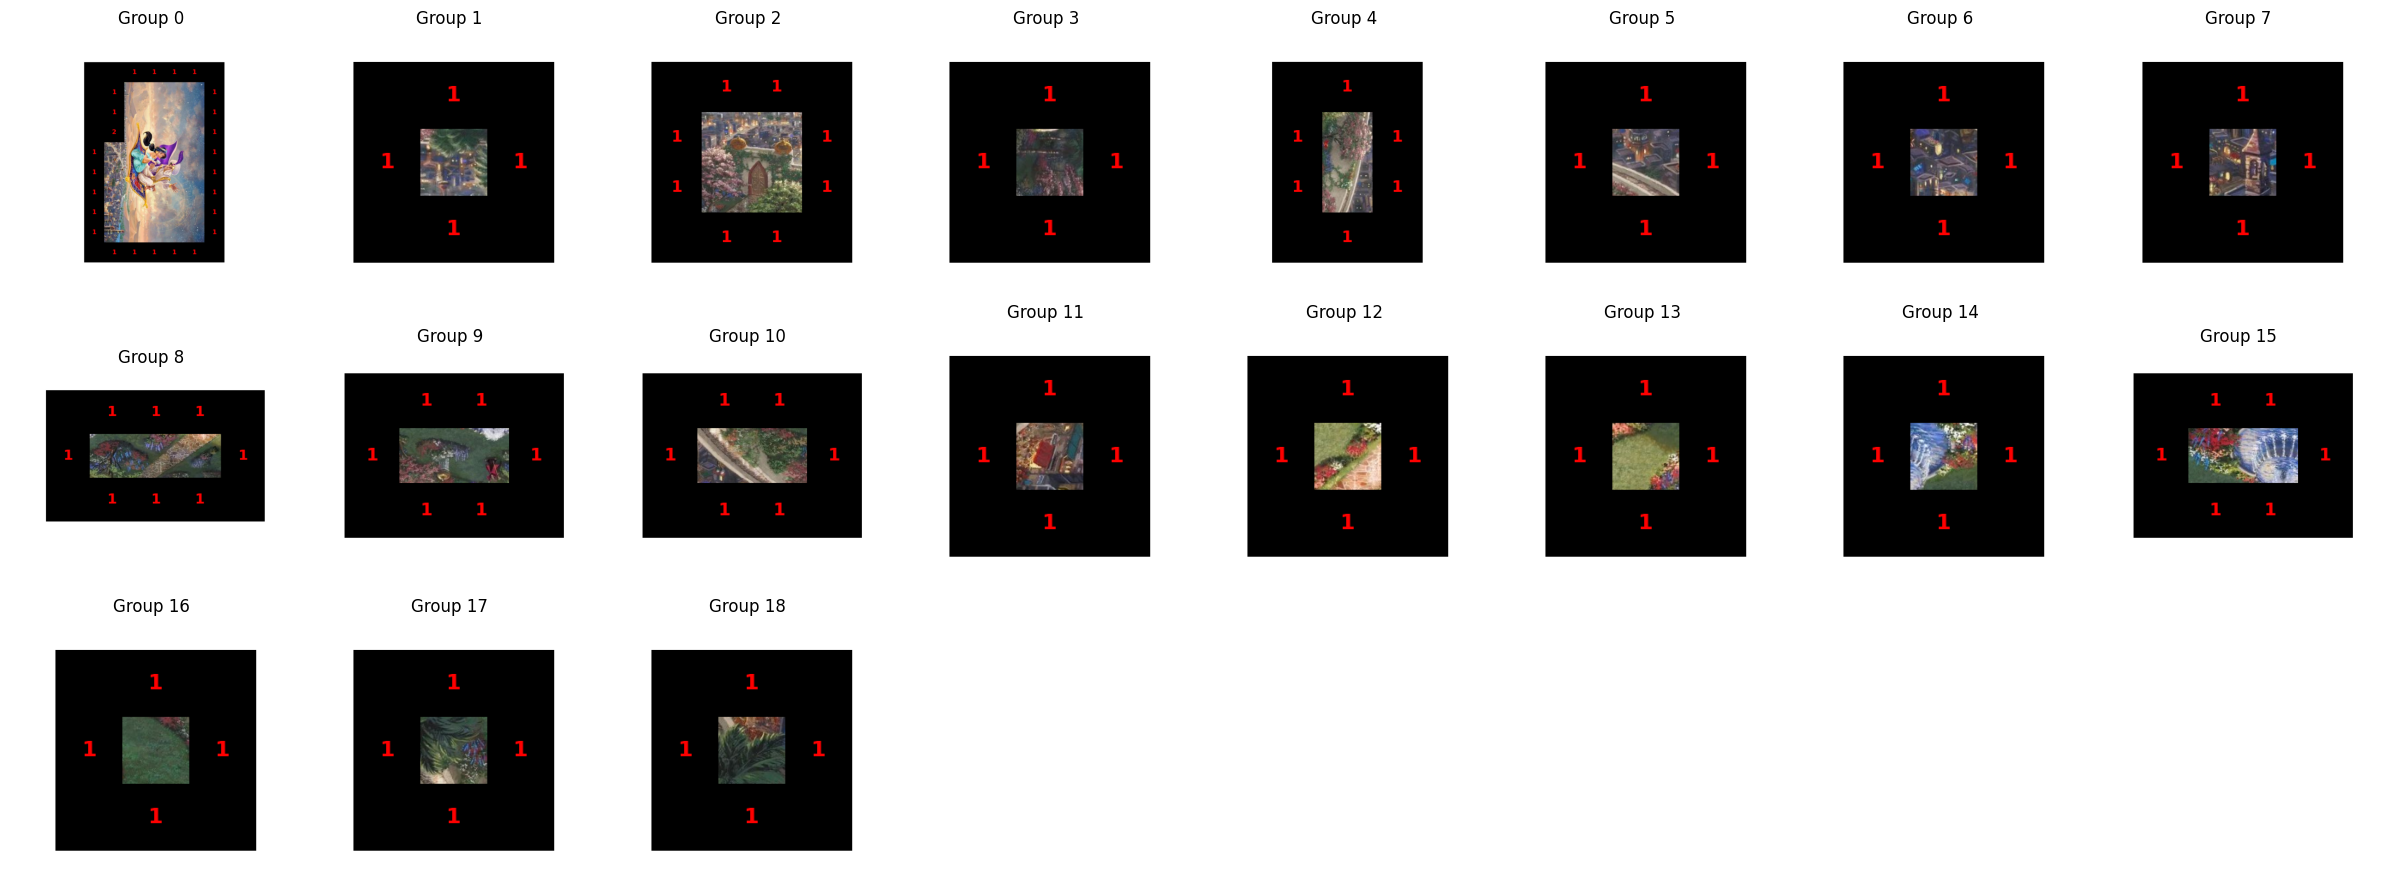

Merged group 0 and 2 with total score: 91930.10292035811 using: Sides Comp: Score=9945.867511527882 Fragment_idx1=26, Side_idx1=1; fragment_idx2=34, side_idx2=2


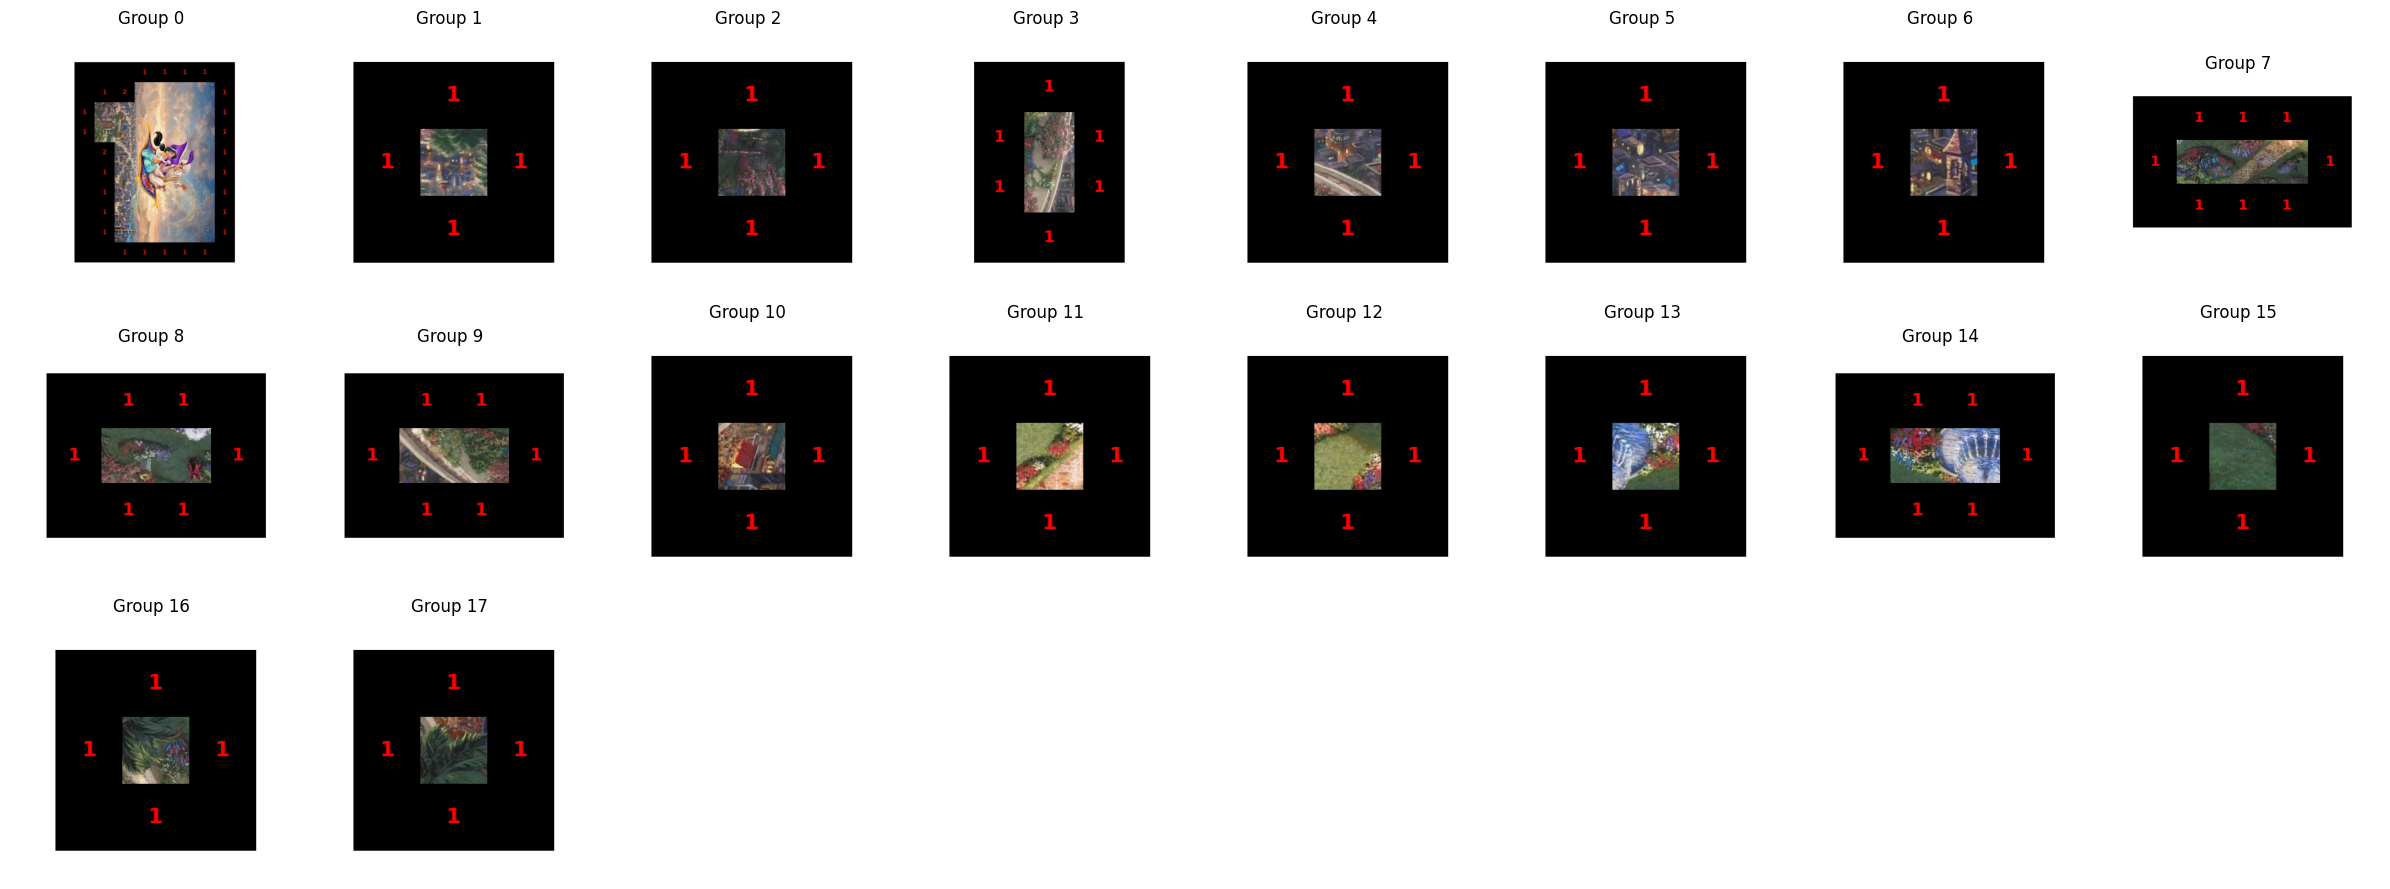

Merged group 0 and 3 with total score: 105.75281844601949 using: Sides Comp: Score=61.271571221039 Fragment_idx1=42, Side_idx1=2; fragment_idx2=43, side_idx2=0


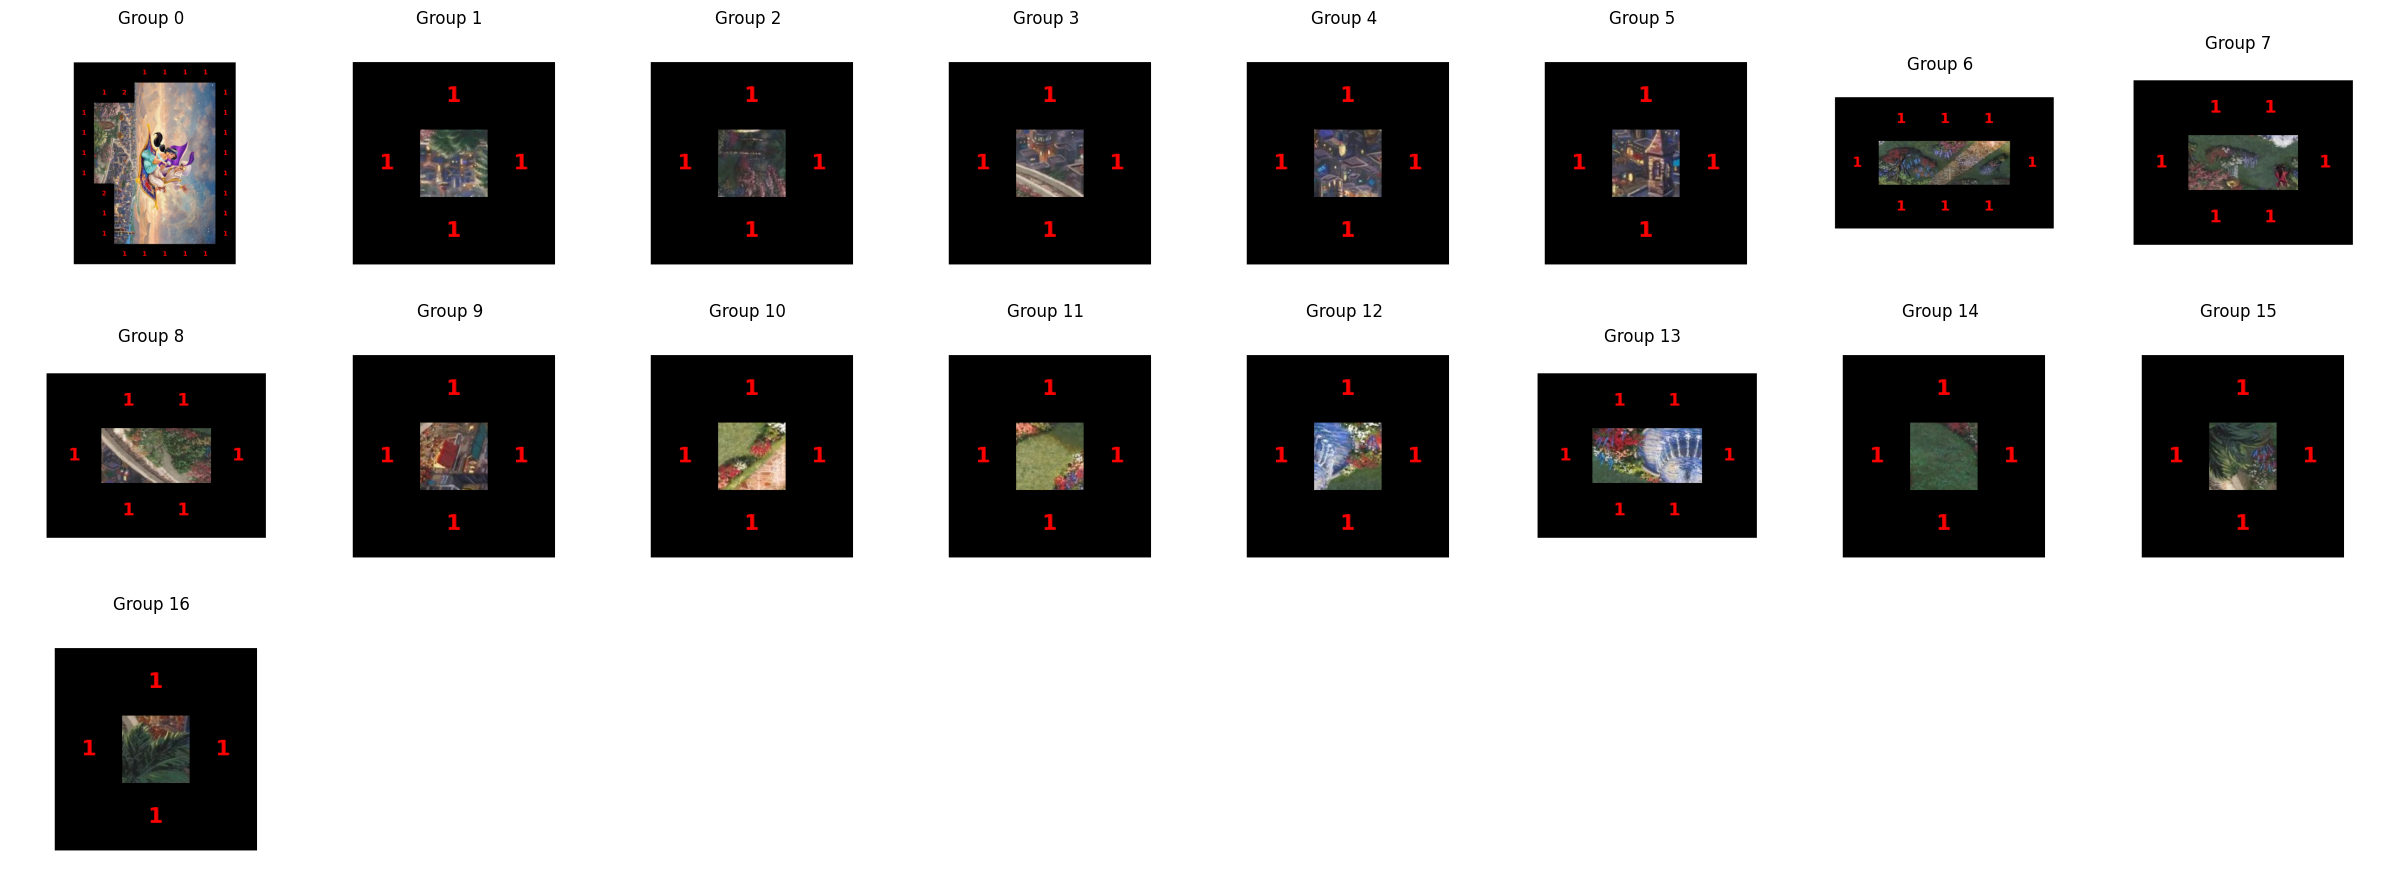

Merged group 0 and 3 with total score: 18.545386835059627 using: Sides Comp: Score=0.8609870023270955 Fragment_idx1=44, Side_idx1=3; fragment_idx2=45, side_idx2=3


KeyboardInterrupt: 

<Figure size 303x303 with 0 Axes>

In [ ]:
groups, fragments, fragment_idx_to_group_idx = solve_groups(groups, fragments, fragment_idx_to_group_idx)
show_all_groups(groups, fragments, fragment_idx_to_group_idx, 0)



In [ ]:
gt_comparisons = read_valid_comparisons(os.path.join("solution","valid_comparisons.txt"))



comparisons = []

for g in groups:
    n = len(g.grid)
    m = len(g.grid[0])

    for i in range(n):
        for j in range(m):
            fr1_idx = g.grid[i][j]
            if fr1_idx is not None:
                if j + 1 < m:
                    side1_idx = find_side_idx_of_orientation(fragments[fr1_idx].rotation, 1)
                    fr2_idx = g.grid[i][j + 1]
                    if fr2_idx is not None:
                        side2_idx = find_side_idx_of_orientation(fragments[fr2_idx].rotation,3)
                        comparisons.append((fr1_idx, fr2_idx, side1_idx, side2_idx))

                if i + 1 < n:
                    side1_idx = find_side_idx_of_orientation(fragments[fr1_idx].rotation, 2)
                    fr2_idx = g.grid[i + 1][j]
                    if fr2_idx is not None:
                        side2_idx = find_side_idx_of_orientation(fragments[fr2_idx].rotation, 0)
                        comparisons.append((fr1_idx, fr2_idx, side1_idx, side2_idx))

correct = 0
nr_of_comp = int((2 * 4 + 3 * ((global_values.COL_NR - 2) * 2 + (global_values.ROW_NR - 2)* 2) + 4 * ((global_values.COL_NR -2) * (global_values.COL_NR-2)))/2)
for s_comp in comparisons:
    for gt_comp in gt_comparisons:
        if s_comp == gt_comp:
            correct+=1
        if s_comp[0] == gt_comp[1] and s_comp[1] == gt_comp[0] and s_comp[2] == gt_comp[3] and s_comp[3] == gt_comp[2]:
            correct+=1

accuracy = (correct/nr_of_comp) * 100
print(f"Accuracy of algorithm: {accuracy}%")

Accuracy of algorithm: 100.0%
